# 线性回归

一个简单的例子，线性模型$y = \alpha  + \beta x$的拟合  
$y = \alpha  + \beta x$

## 生成数据

In [1]:
#导入模块
import numpy as np

我爱北京天安门   
天安门上太阳升

In [2]:
x = np.random.random(30)
x

array([0.69142377, 0.23060144, 0.88696761, 0.87043457, 0.43789361,
       0.44167124, 0.05246325, 0.65135483, 0.31468317, 0.23244583,
       0.36899323, 0.77731811, 0.03076069, 0.38090303, 0.95006428,
       0.96633259, 0.94311631, 0.43740927, 0.09012142, 0.67329922,
       0.0706838 , 0.98325205, 0.88675425, 0.57064021, 0.74126641,
       0.87503907, 0.31900056, 0.00728076, 0.29042493, 0.98019112])

In [3]:
help(np.random.random)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



In [4]:
x = 10 * x
x

array([6.91423767, 2.30601436, 8.86967608, 8.7043457 , 4.37893615,
       4.41671236, 0.52463251, 6.51354835, 3.14683172, 2.3244583 ,
       3.68993226, 7.77318115, 0.30760688, 3.80903031, 9.50064278,
       9.66332586, 9.4311631 , 4.37409269, 0.90121418, 6.73299218,
       0.70683803, 9.83252048, 8.86754247, 5.70640213, 7.41266414,
       8.75039069, 3.19000561, 0.07280759, 2.90424928, 9.80191122])

In [5]:
y = 20*x + 3
y

array([141.28475344,  49.12028728, 180.3935217 , 177.08691407,
        90.57872292,  91.3342472 ,  13.49265013, 133.27096695,
        65.93663443,  49.48916599,  76.7986452 , 158.46362292,
         9.15213756,  79.18060619, 193.01285563, 196.26651719,
       191.62326202,  90.48185373,  21.02428366, 137.65984367,
        17.13676051, 199.65040952, 180.3508493 , 117.12804268,
       151.2532829 , 178.0078138 ,  66.80011223,   4.4561518 ,
        61.08498563, 199.03822432])

增加扰动项：$y = ax + b + \varepsilon $

In [6]:
y = 20 * x + 3 + np.random.randn(30)
y

array([142.9163286 ,  50.97446874, 180.50821562, 178.02539443,
        91.27623501,  93.00833922,  13.38643689, 131.6162876 ,
        64.46477835,  49.24990336,  75.65791837, 157.96398673,
        10.09536796,  78.89498214, 192.02540137, 197.12422414,
       191.33376529,  89.93405823,  20.52415804, 137.78663589,
        18.35195634, 198.79845038, 179.52319155, 116.25475513,
       150.33485736, 178.41272866,  68.7261091 ,   5.09253231,
        61.62031177, 197.01228494])

## 绘制散点图 

In [7]:
from plotnine import *
import pandas as pd
%matplotlib inline

In [8]:
x_y = pd.DataFrame({'x':x, 'y':y})
x_y.sample(10)

,x,y
16,9.431163,191.333765
20,0.706838,18.351956
0,6.914238,142.916329
19,6.732992,137.786636
23,5.706402,116.254755
27,0.072808,5.092532
4,4.378936,91.276235
1,2.306014,50.974469
12,0.307607,10.095368
15,9.663326,197.124224


In [9]:
x_y.describe()

,x,y
count,30.000000,30.000000
mean,5.384264,110.696469
std,3.299086,65.649218
min,0.072808,5.092532
25%,2.964895,62.331428
50%,5.061557,104.631547
75%,8.738879,178.315895
max,9.832520,198.798450


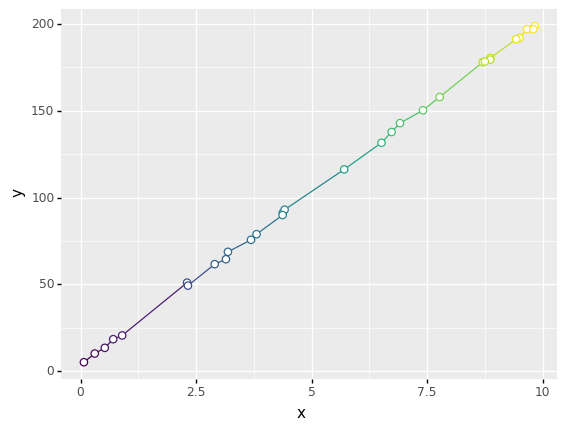

<ggplot: (158991118358)>

In [10]:
(
    ggplot(x_y, aes(x='x', y='y', colour='x+y')) +
    geom_line() +
    geom_point(fill='white', size=2.5) +
    theme(legend_position='none')
)

## 模型拟合

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression()

In [13]:
x = x.reshape(-1, 1)

In [14]:
reg.fit(x, y)

LinearRegression()

In [15]:
print("Fitted lm model is y={:.3}x+{:.3}".format(reg.coef_[0], reg.intercept_))

Fitted lm model is y=19.9x+3.57


## 拟合效果

In [16]:
yhat = reg.predict(x)
yhat

array([141.13810123,  49.44907372, 180.04512341, 176.75557322,
        90.69364231,  91.44526916,  14.00522493, 133.16565458,
        66.17867224,  49.81604954,  76.98465035, 158.22835198,
         9.68710328,  79.35432379, 192.59935939, 195.83623664,
       191.21693412,  90.59727283,  21.49800585, 137.53189089,
        17.63053683, 199.20267285, 180.00267115, 117.10600503,
       151.05520714, 177.67172241,  67.03769571,   5.01534218,
        61.3520511 , 198.59364567])

In [17]:
x_y_yhat = pd.DataFrame({'x':x.flatten(), 'y':y, 'yhat':yhat})

In [18]:
x_y_yhat_melt = pd.melt(x_y_yhat, id_vars='x', var_name='y_type', value_name='value')
x_y_yhat_melt.sample(10)

,x,y_type,value
2,8.869676,y,180.508216
33,8.704346,yhat,176.755573
38,3.146832,yhat,66.178672
8,3.146832,y,64.464778
40,3.689932,yhat,76.984650
18,0.901214,y,20.524158
55,8.750391,yhat,177.671722
5,4.416712,y,93.008339
39,2.324458,yhat,49.816050
10,3.689932,y,75.657918


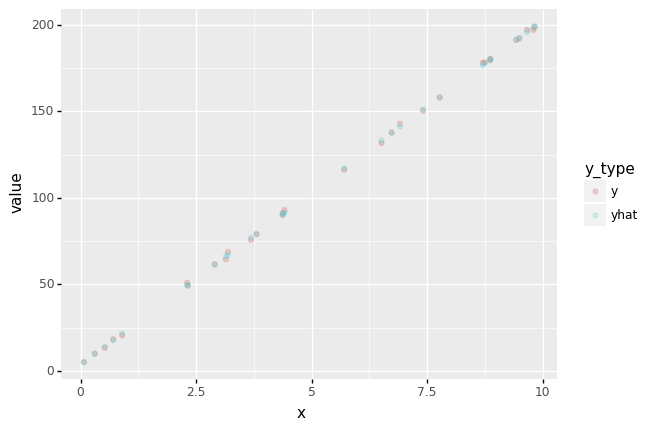

<ggplot: (158991230487)>

In [19]:
(
    ggplot(x_y_yhat_melt, aes(x='x', y='value', colour='y_type')) +
    geom_point(alpha=0.25)
)

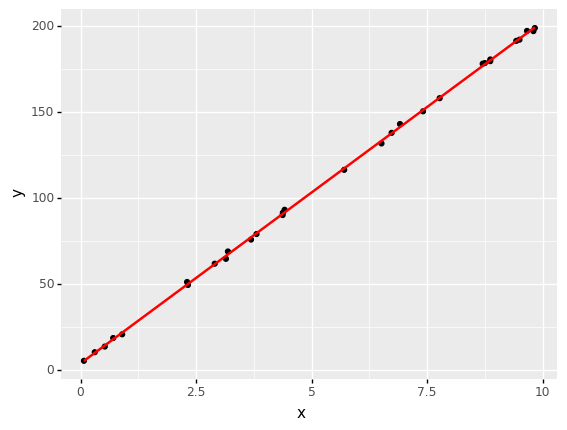

<ggplot: (158991207800)>

In [20]:
(
    ggplot(x_y, aes(x='x', y='y')) +
    geom_point() +
    geom_smooth(method='lm', color='red')
)

In [21]:
from statsmodels.api import OLS

In [22]:
lm2 = OLS(x, y).fit()

In [23]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.086e+05
Date:                Mon, 14 Mar 2022   Prob (F-statistic):                    2.26e-53
Time:                        11:46:54   Log-Likelihood:                          25.702
No. Observations:                  30   AIC:                                     -49.40
Df Residuals:                      29   BIC:                                     -48.00
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0490      0.000    329.474      0.000       0.049       0.049
==============================================================================
Omnibus:                        2.559   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.278   Jarque-Bera (JB):                1.297
Skew:                          -0.080   Prob(JB):                        0.523
Kurtosis:                       1.994   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 简单的函数绘图

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
x = np.linspace(0, 1, 50)

In [26]:
k = 10
y = k*x*np.sin(k*np.pi*x)

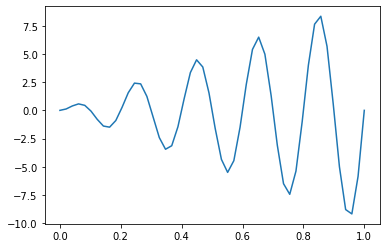

In [27]:
plt.plot(x, y)

🌈🌈🌈🌈  **Time to Play**  ✨✨✨✨

把上边的曲线变得圆滑一点：

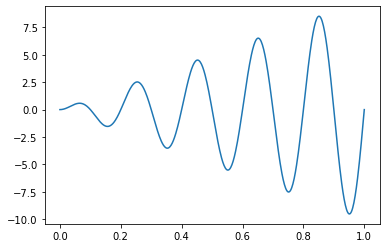

In [28]:
x = np.linspace(0, 1, 500)
k = 10
y = k*x*np.sin(k*np.pi*x)
plt.plot(x, y)

<!--NAVIGATION-->
< [实验环境配置](ch01_实验环境配置.ipynb) | [Contents](Index.ipynb) | [Python基础知识 A](ch02_python基础知识A.ipynb)>